# Описание данных

Данные взяты с https://www.kaggle.com/c/introml-2020-property-prices/data

id - номер объявления <br>
date - дата создания объявления <br>
street_id - id улицы <br>
build_tech - технология строительства здания <br>
floor area - общая площадь квартиры <br>
rooms - количество комнат в квартире <br>
balcon - начилие балкона <br>
metro_dist - расстояние до метро <br>
g_lift - наличие лифта в дома <br>
n_photos - сколько прикреплено фотографий к объявлению <br>
kw1 ... kw13 - это факт наличия некоторых ключевых слов в тексте объявления <br>
price - цена недвижимости

# Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV as rscv
from tqdm import tqdm_notebook
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import auc, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_absolute_error as ase
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('Train.csv', sep=',')
train_df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,616,0.0,4,43,2,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,1738000
1,1,2011-1,112,0.0,3,33,1,0,15.0,1.0,...,0,0,0,0,0,0,0,0,0,1169000
2,2,2011-1,230,NaN,9,34,1,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,2821000
3,3,2011-1,302,1.0,4,60,3,0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,5714000
4,4,2011-1,578,0.0,3,49,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1660000


In [3]:
y=train_df['price'].values
l1=train_df.shape[0]
l2=train_df.shape[1]
print('Всего строк {}'.format(l1))
print('Всего столбцов {}'.format(l2))
X=train_df.iloc[:,2:25]
X=X.drop(['price','kw7','kw11','kw13'],axis='columns')
X=X.fillna(X.median())
X.head()

Всего строк 100000
Всего столбцов 25


,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw8,kw9,kw10,kw12
0,616,0.0,4,43,2,0,30.0,1.0,1,0,1,0,0,0,0,0,0,0,0
1,112,0.0,3,33,1,0,15.0,1.0,2,0,1,0,0,0,0,0,0,0,0
2,230,0.0,9,34,1,0,25.0,0.0,4,0,1,0,0,0,0,0,0,0,0
3,302,1.0,4,60,3,0,15.0,0.0,2,1,1,0,0,0,0,0,0,0,0
4,578,0.0,3,49,2,0,30.0,0.0,2,0,1,0,0,0,0,0,0,0,0


In [4]:
test_df = pd.read_csv('Test.csv', sep=',')
idd=test_df['id']
test_df=test_df.drop(['date','id','kw7','kw11','kw13'],axis='columns')
test_df=test_df.fillna(test_df.median())
test_df.head()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw8,kw9,kw10,kw12
0,422,0.0,1,59,3,0,25.0,0.0,1,0,1,0,0,0,0,0,0,0,0
1,380,0.0,10,58,2,0,25.0,0.0,4,0,1,0,0,0,0,0,0,0,0
2,362,1.0,3,54,2,0,10.0,0.0,2,0,1,0,0,0,0,0,0,0,0
3,34,0.0,4,35,1,0,25.0,1.0,0,0,0,0,0,0,0,0,0,0,0
4,562,0.0,4,56,3,0,30.0,0.0,2,0,1,0,0,0,0,0,0,0,0


# Обработка данных 1

Определим наиболее сильную зависимость от наличия ключевых слов в тексте объявления

In [15]:
x_2 = train_df['kw2']
x_3 = train_df['kw3']
x_4 = train_df['kw4']
x_date = train_df['date']
y = train_df['id']

<BarContainer object of 100000 artists>

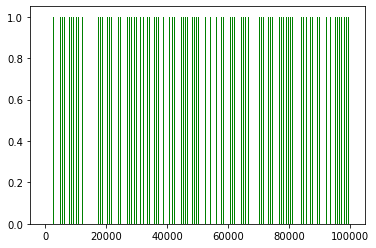

In [16]:
plt.bar(y,
        x_2,
        color='green',
        edgecolor='none',
        width=0.4,
        align='center',
        label='0')

<BarContainer object of 100000 artists>

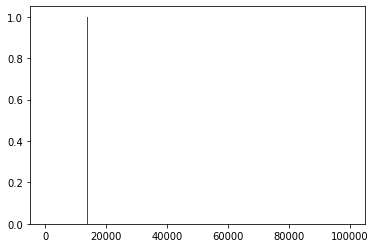

In [ ]:
plt.bar(y,
        x_3,
        color='green',
        edgecolor='none',
        width=0.4,
        align='center',
        label='0')

<BarContainer object of 100000 artists>

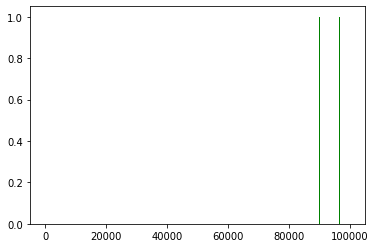

In [ ]:
plt.bar(y,
        x_4,
        color='green',
        edgecolor='none',
        width=0.4,
        align='center',
        label='0')

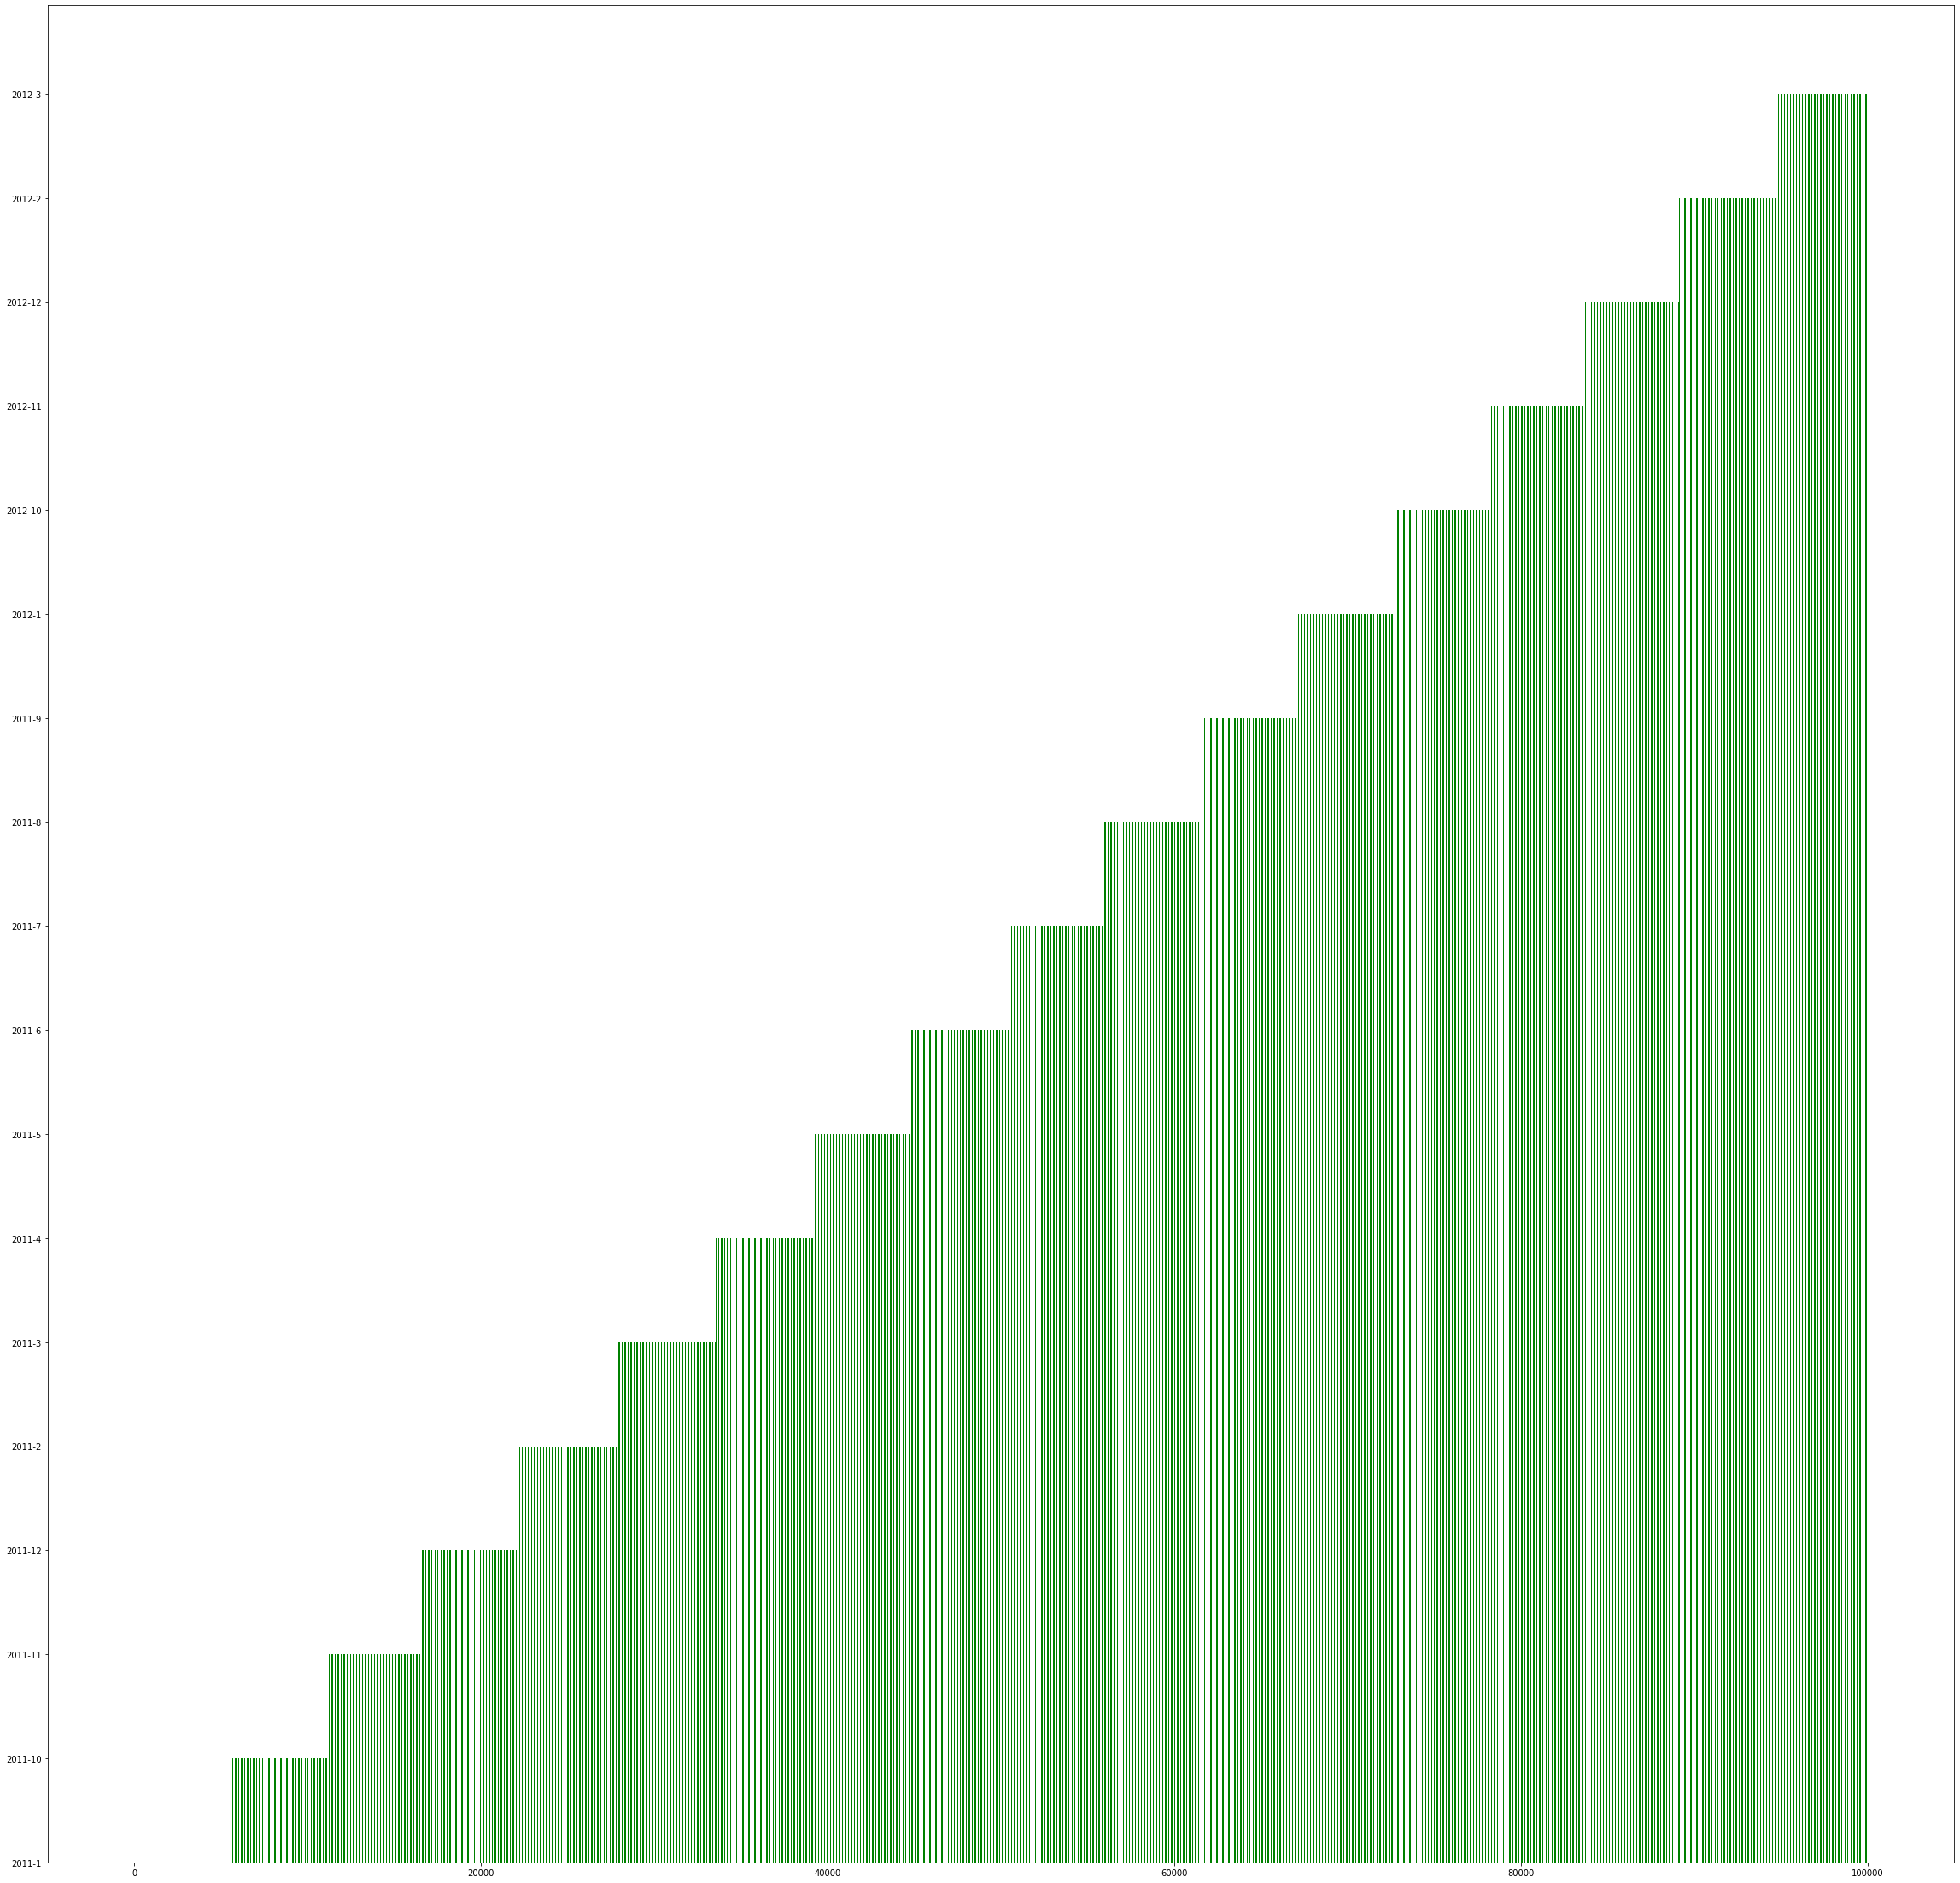

In [ ]:
plt.figure(figsize=(40,40))
plt.bar(y,
        x_date,
        color='green',
        edgecolor='none',
        width=0.4,
        align='center',
        label='0')
plt.show()

Разброс данных зависимости от площади квартиры

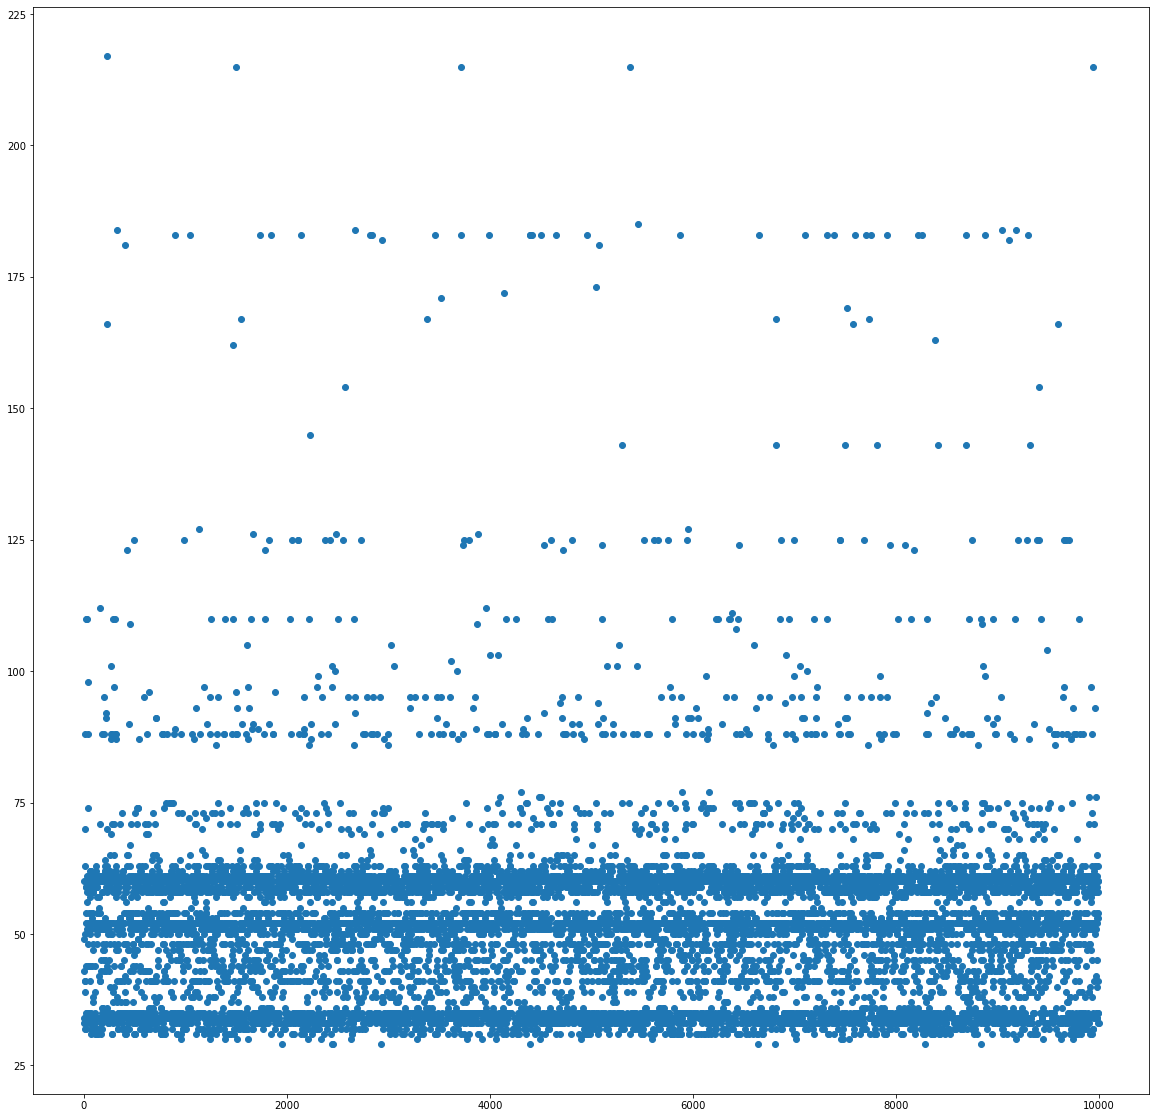

In [17]:
y_l=[]
for i in range(0,10000):
    y_l.append(train_df['area'][i])

x = range(0,10000)
plt.figure(figsize=(20,20))
plt.scatter(x, y_l)
plt.show()

Зависимость цены квартиры от ее расположения (улицы)

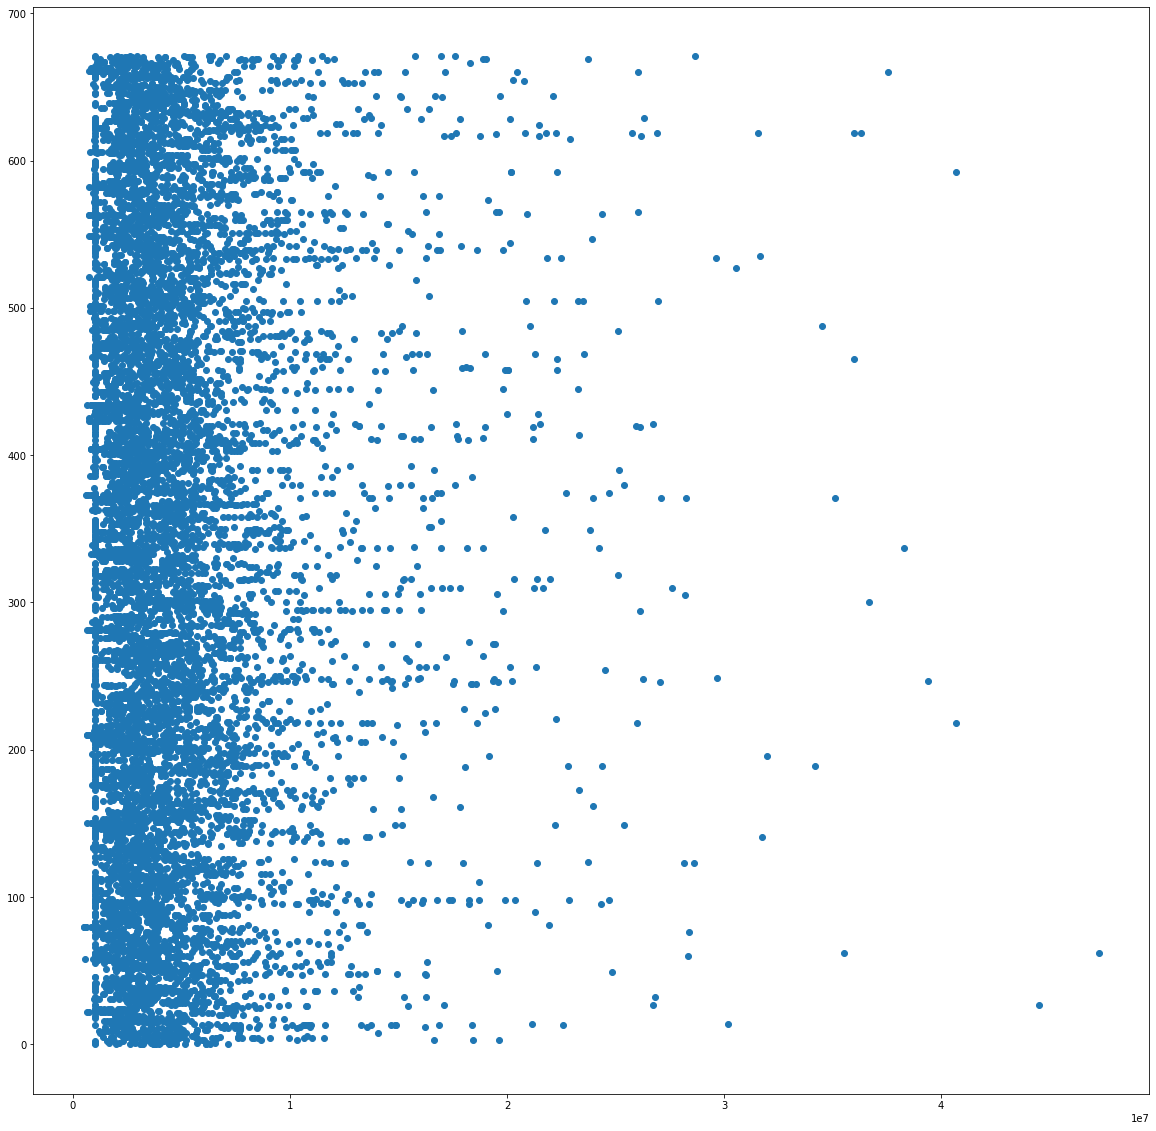

In [18]:
y_price=[]
street_id=[]
for i in range(0,10000):
    street_id.append(train_df['street_id'][i])
    y_price.append(train_df['price'][i])
plt.figure(figsize=(20,20))
plt.scatter(y_price,street_id)
plt.show()

Зависимоть данных цены от площади квартиры

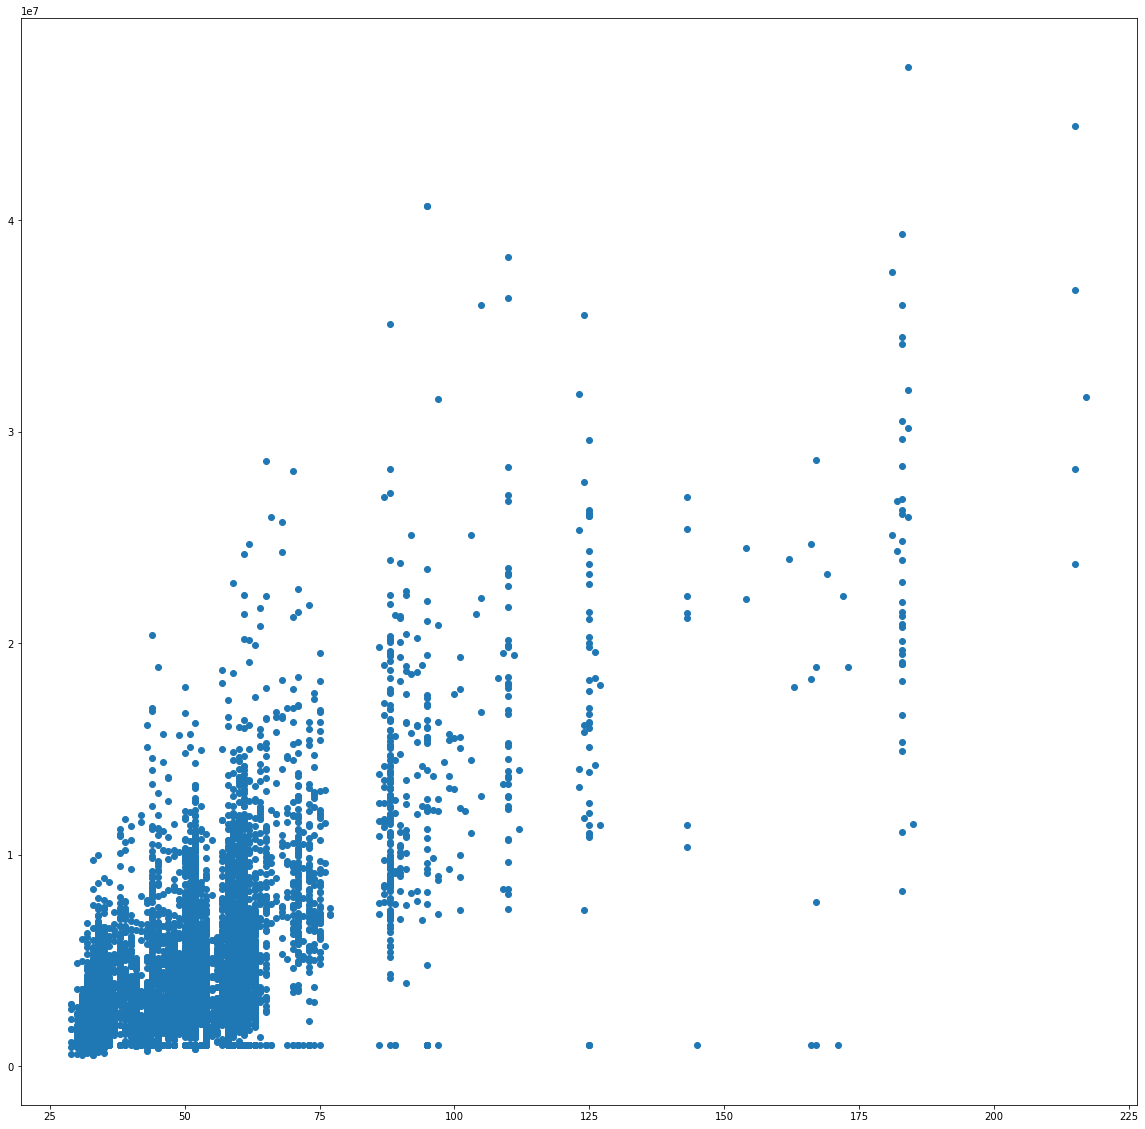

In [19]:
plt.figure(figsize=(20,20))
plt.scatter(y_l,y_price)
plt.show()

# Модель 1

Метрика *mean_absolute_error*

In [9]:
#drop date 7,11,13
#best depth=30
RGBR = GradientBoostingRegressor(n_estimators=1000,max_depth=9)
RGBR.fit(X, y)
temp_pred=RGBR.predict(X)
print(ase(temp_pred,y))

306724.00023218524


In [10]:
resuk=RGBR.predict(test_df)
test_df['id']=idd
test_df["price"] = resuk
test_df[["id", "price"]].to_csv("model_RGBR.csv", index=False)

In [ ]:
train_ase = []
n_estimators = [300, 500, 700]
for n in tqdm_notebook(n_estimators):
    RFR = RandomForestRegressor(n_estimators=n)
    RFR.fit(X, y)
    temp_pred=RFR.predict(X)
    train_ase.append(ase(temp_pred,y))

In [ ]:
cur=np.argmin(train_ase)
best_estimator=n_estimators[cur]
print(best_estimator)
print(train_ase[cur])
plt.figure(figsize=(10,10))
plt.plot(n_estimators,train_ase)
plt.show()

In [ ]:
train_ase

# Модель 2

In [ ]:
#drop date 7,11,13
#best depth=30
#for 500 estimators optimum is depth 9
#'kw6','kw7','kw10','kw11','kw12','kw13' - too much
#445691.56239259004
#445016.6328334396//
#372919.35055939265
#345643.0435891761n_estimators=800,max_depth=9
#(n_estimators=800,max_depth=8)
#424213.0818879764
#475147.9066558373
RGBR = GradientBoostingRegressor(loss='huber',learning_rate=0.12,n_estimators=2100,min_samples_leaf=3,max_depth=6) #430847.3134691238 501557.9274039447-cur
RGBR.fit(X, y)
temp_pred=RGBR.predict(X)
print(ase(temp_pred,y)) #кдючевая ячейка 1

In [ ]:
resuk=RGBR.predict(test_df)
test_df['id']=idd
test_df["price"] = resuk
test_df[["id", "price"]].to_csv("huber.csv", index=False) #ключевая ячейка 2

# Модель 3

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=700, learning_rate=0.05, 
                                max_depth=9, min_samples_leaf=3, 
                                min_samples_split=10, loss='huber')
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=1000,
                       max_depth=3, min_child_weight=0)

In [ ]:
stack_gen = StackingCVRegressor(regressors=(gbr, xgboost),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

In [ ]:
def blend_models_predict(X):
    return ((0.3 * gbr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.5 * stack_gen_model.predict(np.array(X))))

In [ ]:
temp_pred=blend_models_predict(X)
print(ase(temp_pred,y))

In [ ]:
resuk=blend_models_predict(test_df)
test_df['id']=idd
test_df["price"] = resuk
test_df[["id", "price"]].to_csv("manymodels.csv", index=False)

# Модель 4 (top)

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor, Pool, cv

*доработка*
перепишем данные

In [ ]:
train = pd.read_csv('Train.csv', sep=',')

In [ ]:
train['year'] = train['date'].map(lambda x: x[:4])
train['month'] = train['date'].map(lambda x: abs(int(x[-2:])))

In [ ]:
train['street_id'].nunique()

In [ ]:
train=train.fillna(train.median())
train['build_tech'] = train['build_tech'].astype(int)

In [ ]:
features = ['street_id', 'build_tech', 'floor', 'area', 'rooms',
       'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3',
       'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
       'kw13', 'year', 'month']

cat_features = ['street_id', 'build_tech']

*конец доработки*

In [ ]:
def cv_score(n_splits=5, params={'iterations':300,
                                       'learning_rate':0.1,
                                      'subsample':0.8,
                                      'max_depth':5,
                                      'loss_function':'MAE',
                                      'silent':True}):
    kf = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = list()
    for train_index, test_index in kf.split(train[features]):
        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features]
        y_train, y_test = train.loc[train_index, 'price'], train.loc[test_index, 'price']
        model = CatBoostRegressor(**params)
        model = model.fit(X_train, y_train, cat_features=cat_features)
        cur_pred = model.predict(X_test)
        scores.append(mean_absolute_error(y_test, cur_pred))
    return sum(scores)/5

In [ ]:
def ct_params_proc():
    params =({'thread_count': 8, 
             'random_seed': 241,
             'loss_function': 'MAE',
              'iterations': 400,
              'silent': True
             }) 
    
    params_all = [('learning_rate', [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]),
                  ('max_depth',[2,3,4,6,7,9]),
                  ('subsample', [0.7, 0.8, 0.9, 1])
                 ]
    
    result_param =[]
    for i in params_all:
        p= i[0]   
        for param_value in i[1]:      
            params[p] = param_value
            result = []
            cv_res = cv_score(params=params)
            calculated = {'params': p, 'value': param_value, 'mae':cv_res}
            result_param.append (calculated)
            print (calculated)
        r = pd.DataFrame(result_param)

        min_mae = float(r[r.params ==p].mae.min())
        best_param = r[(r.params ==p)&(r.mae == min_mae)].value.iloc[0]
        
        params[p] = best_param

        print(r[r.params ==p])
        print(params)
    
    
        x = r.value[r.params==p]
        ax1= plt.subplot()
        ax1.plot(x, r.mae[r.params==p], color = 'red', label = 'mae')
        ax1.grid()
        ax1.legend(loc='lower right')
        ax1.set_title(p)
        plt.show()
        
    return params, min_mae

In [ ]:
best_params, min_mae = ct_params_proc()

In [ ]:
best_params, min_mae

In [26]:
test = pd.read_csv('Test.csv', sep=',')
test['year'] = test['date'].map(lambda x: x[:4])
test['month'] = test['date'].map(lambda x: abs(int(x[-2:])))
test=test.fillna(test.median())
test['build_tech'] = test['build_tech'].astype(int)
test.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,year,month
0,100000,2012-3,422,0,1,59,3,0,25.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2012,3
1,100001,2012-3,380,0,10,58,2,0,25.0,0.0,4,0,1,0,0,0,0,1,0,0,0,0,0,0,2012,3
2,100002,2012-3,362,1,3,54,2,0,10.0,0.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,2012,3
3,100003,2012-3,34,0,4,35,1,0,25.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,3
4,100004,2012-3,562,0,4,56,3,0,30.0,0.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,2012,3


In [27]:
model = CatBoostRegressor(**best_params)
model = model.fit(train[features], train['price'], cat_features=cat_features)

In [28]:
test['subm_pred'] = model.predict(test[features])

In [ ]:
subm = pd.DataFrame(test[['id', 'subm_pred']])
subm.columns = ['id', 'price']
subm.to_csv('bm.csv', index=False)